In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from CLFModel import CLFModel

In [2]:
# loading data
data = torch.load("X_m_classes.pt")
data = torch.tensor(data, dtype=torch.float32)

targets = torch.load("y_m_classes.pt")
targets = torch.tensor(targets, dtype=torch.long)

In [3]:
# defining dataset class
class SignalDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [4]:
# creating train, val and test datasets
train_data = SignalDataset(data[:7000], targets[:7000])
val_data = SignalDataset(data[7000:8000], targets[7000:8000])
test_data = SignalDataset(data[8000:], targets[8000:])

In [5]:
# creating train, val and test dataloaders
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=False)
val_dataloader = DataLoader(val_data)
test_dataloader = DataLoader(test_data)

In [6]:
def train_loop(dataloader, model, criterion, optimizer):
    """trains model on batches and calculates sums epoch loss values to be calculated later"""
#     N_EPOCHS=100
#     for epoch in range(N_EPOCHS):

    epoch_loss = 0.0
    for batch, (inputs, labels) in enumerate(dataloader):
        model.train() # put model in training mode
        optimizer.zero_grad() # zero gradients

        outputs = model(inputs)        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch Loss: {epoch_loss / len(dataloader)}")

def val_loop(dataloader, model, criterion):
    """evaluates model for val accuracy and counts epochs since accuracy has improved"""
    correct = 0
    with torch.no_grad():
        model.eval()
        for inputs, labels in dataloader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds==labels).type(torch.float).sum().item()
    correct /= len(dataloader.dataset)
    accuracy = 100*correct
    global best_valid_accuracy
    global counter
    if accuracy > best_valid_accuracy:
        counter = 0
        best_valid_accuracy = accuracy
        torch.save(model.state_dict(), 'best_model_parameters.pt')
    else:
        counter += 1
    print(f"Validation Accuracy: {(accuracy):>0.1f}")
    print(f"Best Validation Accuracy: {(best_valid_accuracy):>0.1f}% \n")

# def test_loop

In [7]:
model = CLFModel(input_size = 1000, batch_size=64, hidden_size=51, n_classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9)

In [8]:
best_valid_accuracy = 0.0
counter = 0
epochs = 2000
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, criterion, optimizer)
    val_loop(val_dataloader, model, criterion)
    if counter == 50:
        break
print("Done!")

Epoch 1
-------------------------------
Epoch Loss: 2.300214771790938
Validation Accuracy: 24.7
Best Validation Accuracy: 24.7% 

Epoch 2
-------------------------------
Epoch Loss: 2.2811242493716155
Validation Accuracy: 20.1
Best Validation Accuracy: 24.7% 

Epoch 3
-------------------------------
Epoch Loss: 2.227991056442261
Validation Accuracy: 19.7
Best Validation Accuracy: 24.7% 

Epoch 4
-------------------------------
Epoch Loss: 2.0414590001106263
Validation Accuracy: 22.1
Best Validation Accuracy: 24.7% 

Epoch 5
-------------------------------
Epoch Loss: 1.8409111629832875
Validation Accuracy: 24.9
Best Validation Accuracy: 24.9% 

Epoch 6
-------------------------------
Epoch Loss: 1.7190005443312906
Validation Accuracy: 30.1
Best Validation Accuracy: 30.1% 

Epoch 7
-------------------------------
Epoch Loss: 1.5834293766455216
Validation Accuracy: 31.3
Best Validation Accuracy: 31.3% 

Epoch 8
-------------------------------
Epoch Loss: 1.4695672566240483
Validation Acc

Epoch Loss: 0.13162016597661105
Validation Accuracy: 94.8
Best Validation Accuracy: 94.8% 

Epoch 64
-------------------------------
Epoch Loss: 0.13072779537601906
Validation Accuracy: 95.2
Best Validation Accuracy: 95.2% 

Epoch 65
-------------------------------
Epoch Loss: 0.12806397293778984
Validation Accuracy: 95.1
Best Validation Accuracy: 95.2% 

Epoch 66
-------------------------------
Epoch Loss: 0.13340533978559754
Validation Accuracy: 95.3
Best Validation Accuracy: 95.3% 

Epoch 67
-------------------------------
Epoch Loss: 0.1253121706572446
Validation Accuracy: 95.1
Best Validation Accuracy: 95.3% 

Epoch 68
-------------------------------
Epoch Loss: 0.12628929913043976
Validation Accuracy: 94.6
Best Validation Accuracy: 95.3% 

Epoch 69
-------------------------------
Epoch Loss: 0.12222666340795431
Validation Accuracy: 94.7
Best Validation Accuracy: 95.3% 

Epoch 70
-------------------------------
Epoch Loss: 0.12016449638388374
Validation Accuracy: 94.9
Best Validat

Epoch Loss: 0.05530623053623871
Validation Accuracy: 96.8
Best Validation Accuracy: 97.1% 

Epoch 126
-------------------------------
Epoch Loss: 0.05488441950556907
Validation Accuracy: 96.8
Best Validation Accuracy: 97.1% 

Epoch 127
-------------------------------
Epoch Loss: 0.05387469342994419
Validation Accuracy: 96.6
Best Validation Accuracy: 97.1% 

Epoch 128
-------------------------------
Epoch Loss: 0.05552227995781736
Validation Accuracy: 97.3
Best Validation Accuracy: 97.3% 

Epoch 129
-------------------------------
Epoch Loss: 0.05386406510052356
Validation Accuracy: 97.2
Best Validation Accuracy: 97.3% 

Epoch 130
-------------------------------
Epoch Loss: 0.06289621124636721
Validation Accuracy: 96.8
Best Validation Accuracy: 97.3% 

Epoch 131
-------------------------------
Epoch Loss: 0.06359910896386613
Validation Accuracy: 96.9
Best Validation Accuracy: 97.3% 

Epoch 132
-------------------------------
Epoch Loss: 0.05098216872323643
Validation Accuracy: 97.4
Best

Epoch Loss: 0.014286255703138356
Validation Accuracy: 98.0
Best Validation Accuracy: 98.8% 

Epoch 187
-------------------------------
Epoch Loss: 0.013711854580535808
Validation Accuracy: 98.1
Best Validation Accuracy: 98.8% 

Epoch 188
-------------------------------
Epoch Loss: 0.013170025291302326
Validation Accuracy: 98.1
Best Validation Accuracy: 98.8% 

Epoch 189
-------------------------------
Epoch Loss: 0.013075130330187014
Validation Accuracy: 98.1
Best Validation Accuracy: 98.8% 

Epoch 190
-------------------------------
Epoch Loss: 0.012688297012143515
Validation Accuracy: 97.9
Best Validation Accuracy: 98.8% 

Epoch 191
-------------------------------
Epoch Loss: 0.012401641439646482
Validation Accuracy: 98.2
Best Validation Accuracy: 98.8% 

Epoch 192
-------------------------------
Epoch Loss: 0.012032834604509513
Validation Accuracy: 98.1
Best Validation Accuracy: 98.8% 

Epoch 193
-------------------------------
Epoch Loss: 0.011808981830042533
Validation Accuracy: 9

In [9]:
def test_loop(dataloader, model):
    correct = 0
    test_preds = []
    test_labels = []
    
    with torch.no_grad():
        model.eval()
        for inputs, labels in dataloader:
            outputs = model(inputs)
            _, pred = torch.max(outputs, 1)
            correct += (pred == labels).type(torch.float).sum().item()
            test_preds += pred
            test_labels += labels           
            
    correct /= len(dataloader.dataset)
    accuracy = 100*correct
    test_preds = torch.stack(test_preds).numpy()
    test_labels = torch.stack(test_labels).numpy()
    
    return accuracy, test_preds, test_labels

In [10]:
model.load_state_dict(torch.load('best_model_parameters.pt', map_location='cpu'))

<All keys matched successfully>

In [11]:
accuracy, test_preds, test_labels = test_loop(test_dataloader, model)

In [12]:
accuracy

97.85000000000001

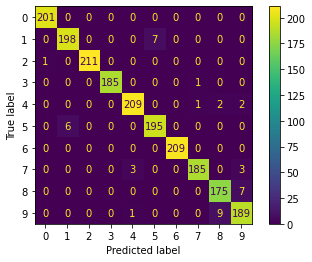

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_labels, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# The model trained for 219 epochs and achieved validation accuracy of 98.8% and test accuracy of
# 97.9%.  There was a small amount of confusion between classes 1 and 5, and between classes 8 and
# 9, as well as a few other various misclassifications.